<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/08-01/GX1_gating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `git config --global user.email {userdata.get('email')}'
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `git config --global user.name {userdata.get('name')}'
Cloning into 'gator'...
remote: Enumerating objects: 1439, done.
remote: Counting objects: 100% (729/729), done.
remote: Compressing objects: 100% (403/403), done.
remote: Total 1439 (delta 472), reused 503 (delta 316), pack-reused 710
Receiving objects: 100% (1439/1439), 90.54 MiB | 16.13 MiB/s, done.
Resolving deltas: 100% (841/841), done.
Updating files: 100% (188/188), done.


'/content'

### 01-08-24 LiTaO3 Xcut Gold deposited 1st sample

Gate voltage parameters :
- Amp : 1Vpp
- Offset : 500 mV
- Duty Cycle : 75%

Taped the gating electrode at maximum



In [3]:
%cd "/content/gator/data/08-01/"

/content/gator/data/08-01


In [4]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [5]:
prep_csv('defbuffer1_0801_111336.csv')
df = pd.read_csv('defbuffer1_0801_111336.csv')


Fill Mode,1



In [6]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,3.425451e-11,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,-0.000969,Volt DC,0.01,F,2W,F,F,0.000000
1,-5.966335e-12,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,-0.000158,Volt DC,0.01,F,2W,F,F,0.069430
2,-1.265890e-11,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.000005,Volt DC,0.01,F,2W,F,F,0.482096
3,1.396014e-11,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.000043,Volt DC,0.01,F,2W,F,F,0.673827
4,2.574689e-11,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.000061,Volt DC,0.01,F,2W,F,F,0.743198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26197,1.177411e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999976,Volt DC,1.00,T,2W,F,F,2712.142507
26198,1.179940e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999976,Volt DC,1.00,T,2W,F,F,2712.211837
26199,1.179952e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999978,Volt DC,1.00,T,2W,F,F,2712.281170
26200,1.177342e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999978,Volt DC,1.00,T,2W,F,F,2712.350510


In [7]:
# Time (s)
T = df['Relative Time']

# Current (nA)
I = df['Reading'] * 1e9

# Potential (mV)
V = df['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

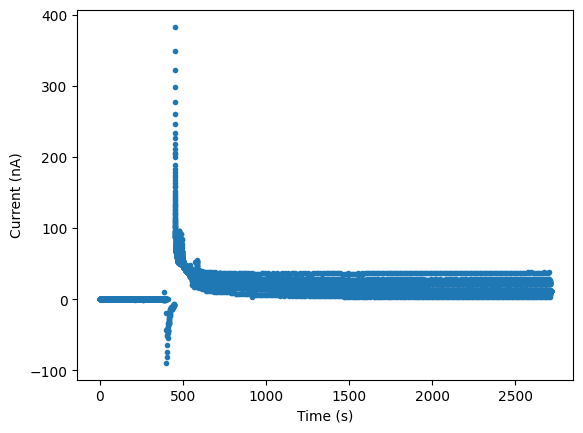

In [8]:
cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

Gating worked ! Periodicity happening :))

Text(0.5, 0, 'Time (s)')

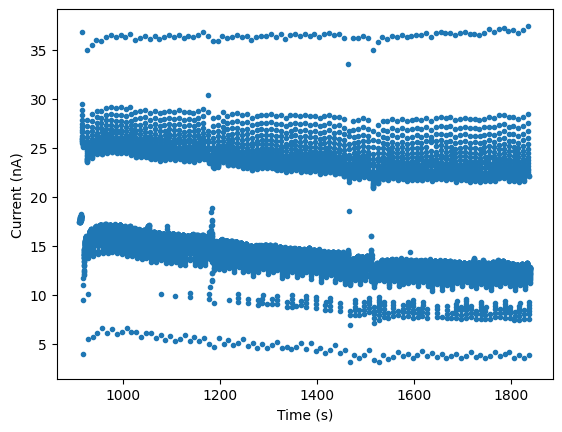

In [9]:
cut1 = 7000
cut2 = 17000
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

We can see a periodicity but the current is dropping (?)

Text(0.5, 0, 'Time (s)')

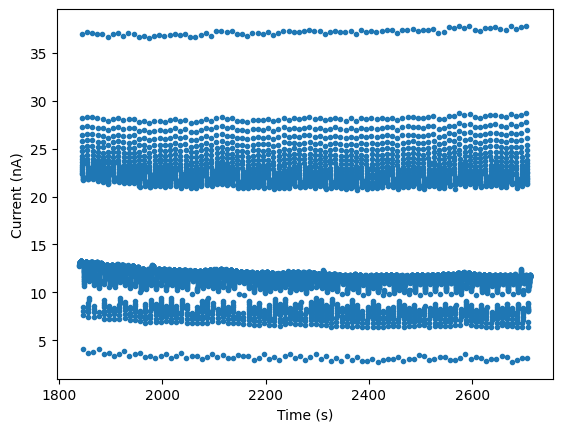

In [10]:
cut1 = 17000
cut2 = None
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

Constant current

In [11]:
df_new = df[['Relative Time', 'Value', 'Reading']]
df_new.loc[:, 'Reading'] = df_new['Reading'] * 1e9
df_new.loc[:, 'Value'] = df_new['Value']
df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)

<ipython-input-11-db179bee8aa1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)


In [12]:

# prompt: generately plotly express scatter plots of current and voltage over time from df_new

# fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)", "Vds (1e-2 V)"])
fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)"])
fig.show()

# Constant current (stoichiometric polarization)
- 1s delay
- 15h
- 1nA

In [13]:
prep_csv('defbuffer1_0804_083752.csv')
df = pd.read_csv('defbuffer1_0804_083752.csv')

Fill Mode,1



In [14]:
px.scatter(df, x="Relative Time", y=["Reading"])

In [20]:
# Time (s)
T = df['Relative Time']

# Potential (mV)
V = df['Reading'] * 1e3

# Current (nA)
I = df['Value'] * 1e9

Text(0.5, 0, 'Time (s)')

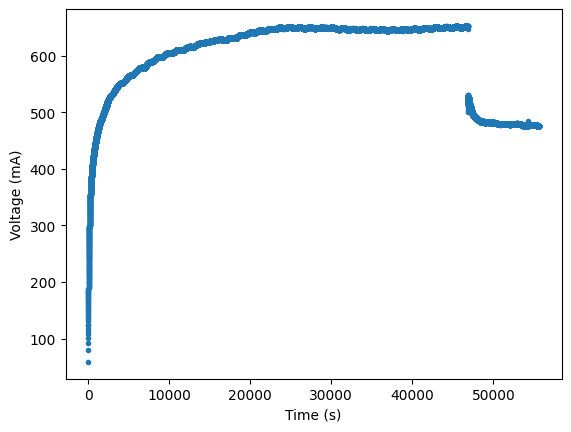

In [21]:
plt.plot(T,V,'.')
plt.ylabel('Voltage (mA)')
plt.xlabel('Time (s)')

In [26]:
Vinf = np.mean(V[20000:30000])

In [27]:
print(f'Averaged between times {T[20000]} and {T[30000]}')
print(f'Vinf = {Vinf} mV')

Averaged between times 21387.84226188 and 32081.4774931
Vinf = 648.472189027071 mV


In [28]:
Vlin = np.log(Vinf * np.ones_like(V) - V)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log



(2.0, 7.0)

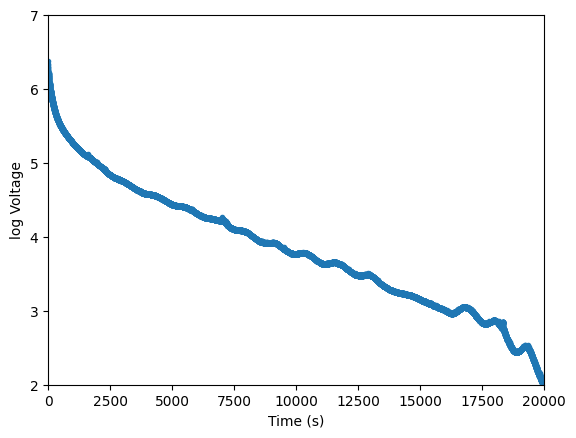

In [32]:
plt.plot(T,Vlin,'.')
plt.ylabel('log Voltage')
plt.xlabel('Time (s)')
plt.xlim(0,20000)
plt.ylim(2,7)

(2500,5)
(17500,3)

Slope = 2/15000

Yet again, $\tau$ ~ 1e4